In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import operator
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### train, test set split

In [2]:
X = iris.data
Y = iris.target
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# print(type(y_train[0]))
print(len(X_train), len(X_test), len(y_train), len(y_test))

(150, 4)
105 45 105 45


### Visualization

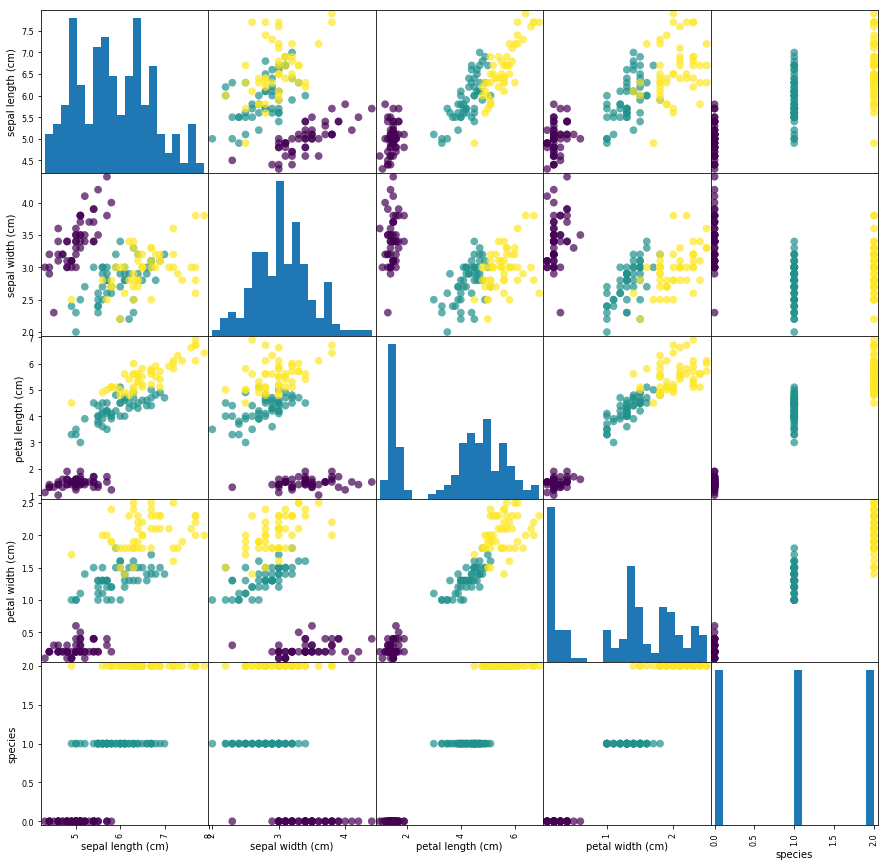

In [3]:
iris_df = pd.DataFrame(X, columns=iris['feature_names'])
iris_df['species'] = Y

pd.plotting.scatter_matrix(iris_df, c=Y, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.7)
                            # color=Y, bin size of histogram=20, size of point=60, alpha=투명도
plt.show()

### Hard Coding 
### euclideanDistance : instance1과 instance2 사이의 거리를 리턴

In [4]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += (instance1[x] - instance2[x])**2
    return distance**0.5

euclideanDistance([0,0],[1,1],2)

1.4142135623730951

### getNeighbors : X_train에서 testInstance와 가까운 k개 원소의 인덱스를 리턴

In [5]:
def getNeighbors(X_train, testInstance, k):
    distances = []
    length = len(testInstance)
    for x in range(len(X_train)):
        dist = euclideanDistance(testInstance, X_train[x], length)
        distances.append((x, dist))
    distances.sort(key=operator.itemgetter(1)) # dist를 기준으로 sort하자.
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0]) # X_train에서 가까운 원소의 인덱스를 저장
    return neighbors

getNeighbors([[0,0], [80,80], [100,100], [1000,1000]], [70,70], 2)

[1, 2]

### getResponse : neighbors에서 다수결로 레이블을 결정
### getAccuracy : y_test와 prediction의 일치성(정확도)을 리턴

In [6]:
def getResponse(neighbors):
    classVotes = {}
    for x in neighbors:
        response = y_train[x]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(y_test, predictions):
    correct = 0
    for x in range(len(y_test)):
        if y_test[x] == predictions[x]:
            correct += 1
    return (correct/float(len(y_test))) * 100.0


In [7]:
def main():
    predictions=[]
    k = 3
    for x in range(len(y_test)):
        neighbors = getNeighbors(X_train, X_test[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(y_test[x]))
    accuracy = getAccuracy(y_test, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()

> predicted=2, actual=2
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=2, actual=2
> predicted=0, actual=0
> predicted=2, actual=2
> predicted=0, actual=0
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=2, actual=2
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=1, actual=1
> predicted=0, actual=0
> predicted=2, actual=1
> predicted=1, actual=1
> predicted=1, actual=1
> predicted=2, actual=2
> predicted=0, a

#하드코딩은 어려워요ㅎ.. 그냥 모듈 사용하셔도 좋아요! 
#적정 k 확인 -> 모델 결과 보기
### k에 따른 정확도 / error 변화 확인하기

In [8]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

accuracy = []
error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_pred = knn.predict(X_test)
    accuracy.append(np.mean(np.array(y_test).astype(np.int32)== test_pred))
    error.append(np.mean(test_pred != y_test))

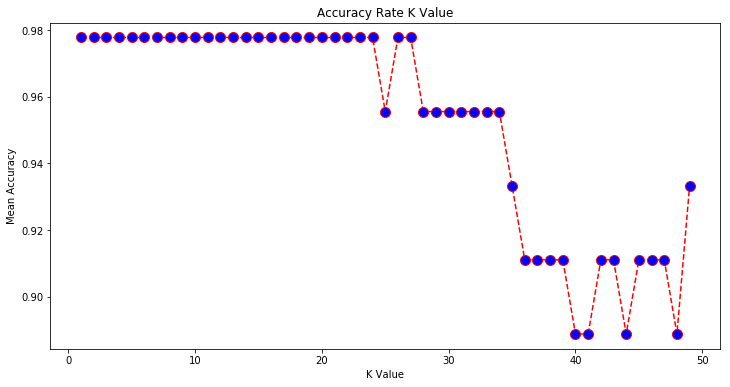

In [9]:
#k 값에 따른 정확도 변화
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy')  
plt.show()

In [10]:
df_accuracy = pd.DataFrame({"accuracy":accuracy}, index = range(1,50)) 
df_accuracy

,accuracy
1,0.977778
2,0.977778
3,0.977778
4,0.977778
5,0.977778
6,0.977778
7,0.977778
8,0.977778
9,0.977778
10,0.977778


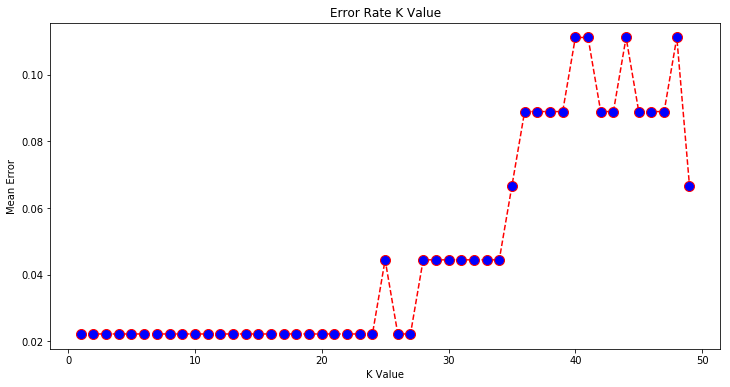

In [11]:
#k값에 따른 오류율 변화
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [12]:
##test_pred VS y_test 분류 결과 비교
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
test_pred = knn.predict(X_test)

df = pd.DataFrame({"test_pred":test_pred, "y_test":y_test})
df

,test_pred,y_test
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1
